<a href="https://colab.research.google.com/github/Andicleomj/Robotika-dan-Sistem-Cerdas/blob/main/Week%2012/Code%20Python/Introduction%20to%20Localization%20and%20FilteringTheory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Andi Cleopatra Maryam Jamila
#### 1103213071
#### Tugas Week 12

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

* import numpy untuk komputasi numerik
* import matplot untuk membuat grafik

In [ ]:
# 1. Implementasi Filter Kalman untuk Estimasi Posisi Robot
class KalmanFilter:
    def __init__(self, A, B, H, Q, R, P, x):
        self.A = A  # Matriks Transisi
        self.B = B  # Matriks Kontrol Input
        self.H = H  # Matriks Pengamatan
        self.Q = Q  # Noise Proses
        self.R = R  # Noise Pengamatan
        self.P = P  # Kovarian Error
        self.x = x  # State

    def predict(self, u):
        self.x = self.A @ self.x + self.B @ u
        self.P = self.A @ self.P @ self.A.T + self.Q

    def update(self, z):
        K = self.P @ self.H.T @ np.linalg.inv(self.H @ self.P @ self.H.T + self.R)
        self.x = self.x + K @ (z - self.H @ self.x)
        self.P = (np.eye(len(self.P)) - K @ self.H) @ self.P

* Matriks ini digunakan untuk mendefinisikan model sistem (dinamika pergerakan robot) dan bagaimana pengamatan diambil dari state sistem.
* Fungsi: Memperbarui prediksi state berdasarkan model sistem dan input kontrol u.
  * self.x = self.A @ self.x: Memprediksi state baru berdasarkan model transisi.
  * self.B @ u: Menambahkan pengaruh kontrol ke dalam state.
  * self.P = self.A @ self.P @ self.A.T + self.Q: Memperbarui kovarian error dengan mempertimbangkan noise proses.
* Fungsi: Memperbarui estimasi state berdasarkan pengamatan z.
  * K: Matriks gain Kalman yang menyeimbangkan antara prediksi model dan pengamatan.
  * z - self.H @ self.x: Residual error antara pengamatan dan prediksi.
  * self.x: Diperbarui menggunakan gain Kalman dan residual error.
  * self.P: Kovarian error diperbarui setelah pembobotan ulang dengan gain Kalman.

In [ ]:
# Parameter Kalman Filter
A = np.array([[1, 1], [0, 1]])
B = np.array([[0.5], [1]])
H = np.array([[1, 0]])
Q = np.array([[0.1, 0], [0, 0.1]])
R = np.array([[1]])
P = np.eye(2)
x = np.array([0, 0])

kf = KalmanFilter(A, B, H, Q, R, P, x)

* A: Model pergerakan, memperbarui posisi berdasarkan posisi dan kecepatan.
* B: Menghubungkan input kontrol (kecepatan) ke state.
* H: Menunjukkan bahwa hanya posisi yang diamati.
* Q: Noise pada model sistem.
* R: Noise pada pengamatan.
* P: Matriks kovarian awal.
* x: State awal, dengan posisi dan kecepatan = 0.

In [ ]:
# Simulasi
steps = 50
u = np.array([1])  # Input kecepatan
positions = []
measurements = []
for _ in range(steps):
    # Prediksi dan update filter
    kf.predict(u)
    z = np.array([kf.x[0] + np.random.normal(0, 1)])  # Simulasi pengamatan dengan noise
    kf.update(z)

    positions.append(kf.x[0])
    measurements.append(z[0])

* Simulasi Posisi Robot:
  * Menggunakan kf.predict(u) untuk memprediksi posisi berdasarkan model.
  * Menambahkan noise pada pengamatan (simulasi sensor).
  * Memperbarui estimasi menggunakan kf.update(z).
* positions: Menyimpan posisi hasil estimasi Kalman Filter.
* measurements: Menyimpan pengamatan dengan noise.

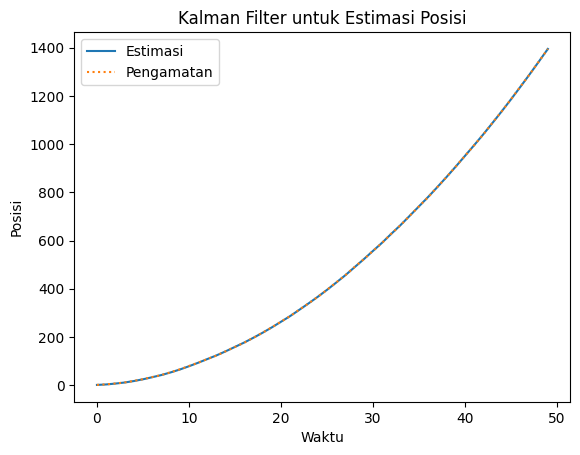

In [ ]:
# Visualisasi
plt.plot(range(steps), positions, label="Estimasi")
plt.plot(range(steps), measurements, label="Pengamatan", linestyle='dotted')
plt.legend()
plt.xlabel("Waktu")
plt.ylabel("Posisi")
plt.title("Kalman Filter untuk Estimasi Posisi")
plt.show()

* menunjukkan estimasi posisi robot menggunakan Kalman Filter (garis biru) yang mendekati data pengamatan (garis oranye putus-putus), meskipun data pengamatan dipengaruhi oleh noise, sehingga membuktikan keefektifan Kalman Filter dalam mereduksi dampak noise untuk menghasilkan estimasi yang lebih akurat.

In [ ]:
# 2. Implementasi Filter Partikel untuk Estimasi Posisi Robot
class ParticleFilter:
    def __init__(self, num_particles, x_range, measurement_noise):
        self.num_particles = num_particles
        self.particles = np.random.uniform(x_range[0], x_range[1], num_particles)
        self.weights = np.ones(num_particles) / num_particles
        self.measurement_noise = measurement_noise

    def predict(self, control):
        self.particles += control + np.random.normal(0, 1, self.num_particles)

    def update(self, measurement):
        self.weights = np.exp(-((self.particles - measurement)**2) / (2 * self.measurement_noise**2))
        self.weights /= np.sum(self.weights)

    def resample(self):
        indices = np.random.choice(range(self.num_particles), size=self.num_particles, p=self.weights)
        self.particles = self.particles[indices]
        self.weights.fill(1.0 / self.num_particles)

    def estimate(self):
        return np.mean(self.particles)

* Kelas ParticleFilter:
  * __init__: Inisialisasi partikel secara uniform, bobot, dan noise pengukuran.
  * predict: Memperbarui posisi partikel berdasarkan kontrol dengan tambahan noise proses.
  * update: Menghitung bobot partikel berdasarkan jaraknya ke pengukuran aktual.
  * resample: Mengambil ulang partikel berdasarkan probabilitas bobot.
  * estimate: Menghitung rata-rata posisi partikel sebagai estimasi posisi.

In [ ]:
# Parameter Filter Partikel
num_particles = 1000
x_range = [0, 100]
measurement_noise = 2
pf = ParticleFilter(num_particles, x_range, measurement_noise)

* Parameter Filter:
  * num_particles: Jumlah partikel dalam filter.
  * x_range: Rentang inisialisasi posisi partikel.
  * measurement_noise: Tingkat noise pada pengukuran.

In [ ]:
# Simulasi
positions_pf = []
measurements_pf = []
true_position = 0
for _ in range(steps):
    true_position += 1
    pf.predict(1)  # Kecepatan konstan
    z = true_position + np.random.normal(0, measurement_noise)
    pf.update(z)
    pf.resample()

    positions_pf.append(pf.estimate())
    measurements_pf.append(z)


* Simulasi:
  * Prediksi posisi partikel menggunakan kecepatan konstan.
  * Memperbarui bobot berdasarkan pengukuran sebenarnya dengan noise.
  * Resampling untuk menyaring partikel dengan bobot rendah.
  * Menyimpan estimasi posisi dan pengukuran untuk visualisasi atau evaluasi.

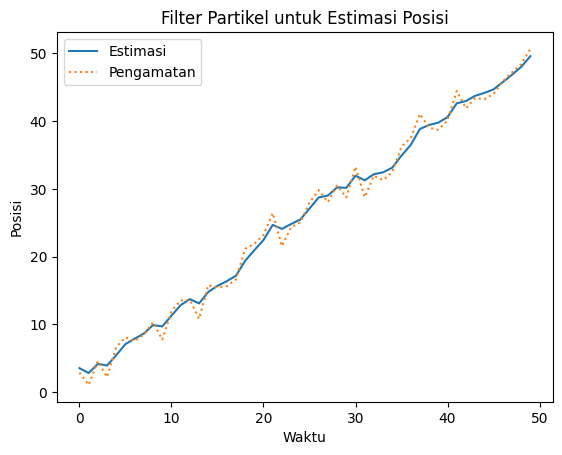

In [ ]:
# Visualisasi
plt.plot(range(steps), positions_pf, label="Estimasi")
plt.plot(range(steps), measurements_pf, label="Pengamatan", linestyle='dotted')
plt.legend()
plt.xlabel("Waktu")
plt.ylabel("Posisi")
plt.title("Filter Partikel untuk Estimasi Posisi")
plt.show()

* menunjukkan bahwa filter partikel dapat digunakan untuk memperkirakan posisi suatu objek secara akurat, bahkan dalam kondisi yang bising atau tidak pasti. Estimasi posisi yang baik sangat penting untuk banyak aplikasi, seperti navigasi robot, pelacakan objek, dan estimasi keadaan dalam sistem dinamis.

In [ ]:
# 3. Implementasi Localization dengan Sensor IMU dan Lidar
class Localization:
    def __init__(self, initial_position, imu_noise, lidar_noise):
        self.position = initial_position
        self.imu_noise = imu_noise
        self.lidar_noise = lidar_noise

    def update_with_imu(self, imu_reading):
        self.position += imu_reading + np.random.normal(0, self.imu_noise)

    def update_with_lidar(self, lidar_reading):
        self.position = (self.position + lidar_reading + np.random.normal(0, self.lidar_noise)) / 2


* Kelas Localization:
  * __init__: Menginisialisasi posisi awal serta tingkat noise dari IMU dan Lidar.
  * update_with_imu: Memperbarui posisi berdasarkan pembacaan IMU dengan tambahan noise.
  * update_with_lidar: Memperbarui posisi dengan rata-rata posisi saat ini dan pembacaan Lidar yang disertai noise.

In [ ]:
# Parameter
imu_noise = 0.5
lidar_noise = 1.0
localization = Localization(0, imu_noise, lidar_noise)

* Parameter:
  * imu_noise: Tingkat noise pada pembacaan sensor IMU.
  * lidar_noise: Tingkat noise pada pembacaan sensor Lidar.

In [ ]:
# Simulasi
positions_loc = []
imu_readings = []
lidar_readings = []
for _ in range(steps):
    imu = 1 + np.random.normal(0, imu_noise)
    lidar = localization.position + np.random.normal(0, lidar_noise)
    localization.update_with_imu(imu)
    localization.update_with_lidar(lidar)

    imu_readings.append(imu)
    lidar_readings.append(lidar)
    positions_loc.append(localization.position)

* Simulasi:
  * Menghasilkan pembacaan IMU dengan noise.
  * Menghasilkan pembacaan Lidar dengan noise relatif terhadap posisi saat ini.
  * Memperbarui posisi berdasarkan pembacaan IMU dan Lidar.
  * Menyimpan data posisi, pembacaan IMU, dan pembacaan Lidar untuk evaluasi.

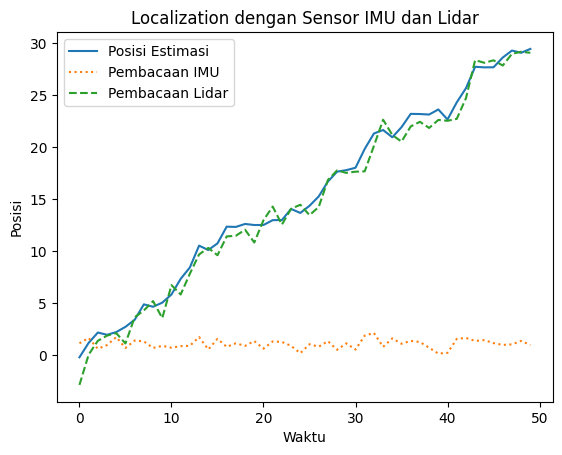

In [ ]:
# Visualisasi
plt.plot(range(steps), positions_loc, label="Posisi Estimasi")
plt.plot(range(steps), imu_readings, label="Pembacaan IMU", linestyle='dotted')
plt.plot(range(steps), lidar_readings, label="Pembacaan Lidar", linestyle='dashed')
plt.legend()
plt.xlabel("Waktu")
plt.ylabel("Posisi")
plt.title("Localization dengan Sensor IMU dan Lidar")
plt.show()

* menunjukkan bahwa dengan menggabungkan data dari sensor IMU dan Lidar, sistem dapat memperoleh estimasi posisi yang lebih akurat dan handal dibandingkan dengan menggunakan hanya satu jenis sensor saja. Teknik ini sangat penting dalam berbagai aplikasi seperti navigasi robot, kendaraan otonom, dan augmented reality.

In [ ]:
# 4. Implementasi Simulasi Ekstensi Kalman Filter untuk Navigasi
class ExtendedKalmanFilter(KalmanFilter):
    def __init__(self, A, B, H, Q, R, P, x, nonlinear_h):
        super().__init__(A, B, H, Q, R, P, x)
        self.nonlinear_h = nonlinear_h

    def update(self, z):
        H_jacobian = self.H  # Jacobian matrix of H (simplified here)
        K = self.P @ H_jacobian.T @ np.linalg.inv(H_jacobian @ self.P @ H_jacobian.T + self.R)
        self.x = self.x + K @ (z - self.nonlinear_h(self.x))
        self.P = (np.eye(len(self.P)) - K @ H_jacobian) @ self.P

* Kelas ExtendedKalmanFilter:
  * Subkelas dari KalmanFilter dengan kemampuan menangani fungsi pengamatan non-linear.
  * __init__: Menambahkan fungsi pengamatan non-linear nonlinear_h ke filter.
  * update: Menggunakan Jacobian matriks H untuk memperbarui estimasi dengan pengamatan non-linear.

In [ ]:
# Nonlinear measurement function
nonlinear_h = lambda x: np.array([np.sqrt(x[0]**2 + x[1]**2)])
ekf = ExtendedKalmanFilter(A, B, H, Q, R, P, x, nonlinear_h)

# Simulasi untuk EKF
positions_ekf = []
for _ in range(steps):
    ekf.predict(u)
    z = nonlinear_h(ekf.x) + np.random.normal(0, 1)
    ekf.update(z)

    positions_ekf.append(ekf.x[0])


* Fungsi nonlinear_h:
  * Menghitung pengamatan sebagai jarak Euclidean dari posisi (state).
* Simulasi EKF:
  * Prediksi posisi menggunakan model dinamis.
  * Menggunakan fungsi pengamatan non-linear untuk memperbarui estimasi dengan data noisy.
  * Menyimpan estimasi posisi setelah setiap iterasi.

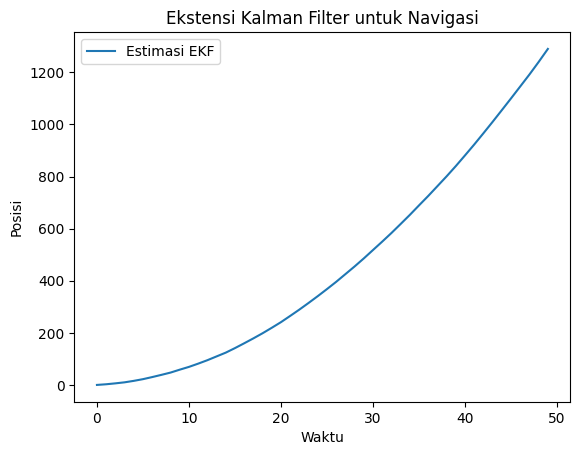

In [ ]:
# Visualisasi
plt.plot(range(steps), positions_ekf, label="Estimasi EKF")
plt.legend()
plt.xlabel("Waktu")
plt.ylabel("Posisi")
plt.title("Ekstensi Kalman Filter untuk Navigasi")
plt.show()

* menunjukkan bahwa EKF dapat digunakan untuk memperkirakan posisi suatu objek secara akurat. Estimasi posisi yang baik sangat penting untuk berbagai aplikasi, seperti navigasi robot, kendaraan otonom, dan sistem kontrol penerbangan.

In [ ]:
# 5. Implementasi Particle Filter untuk Navigasi
class ParticleFilterNavigation(ParticleFilter):
    def __init__(self, num_particles, x_range, measurement_noise, control_noise):
        super().__init__(num_particles, x_range, measurement_noise)
        self.control_noise = control_noise

    def predict(self, control):
        self.particles += control + np.random.normal(0, self.control_noise, self.num_particles)

* Kelas ParticleFilterNavigation: Subclass dari ParticleFilter yang menambahkan kebisingan kontrol (control_noise) untuk pergerakan partikel.

In [ ]:
# Parameter Navigasi
control_noise = 0.5
pf_navigation = ParticleFilterNavigation(num_particles, x_range, measurement_noise, control_noise)

* Fungsi predict: Memperbarui posisi partikel dengan kontrol yang diberikan, ditambah dengan kebisingan kontrol yang dihasilkan secara acak.

In [ ]:
# Simulasi Navigasi
positions_nav = []
true_position_nav = 0
for _ in range(steps):
    true_position_nav += 1
    pf_navigation.predict(1)
    z_nav = true_position_nav + np.random.normal(0, measurement_noise)
    pf_navigation.update(z_nav)
    pf_navigation.resample()

    positions_nav.append(pf_navigation.estimate())

* Simulasi Navigasi:
  * true_position_nav adalah posisi sebenarnya yang bertambah setiap langkah.
  * pf_navigation.predict(1) memindahkan partikel berdasarkan kontrol.
  * z_nav adalah pengukuran posisi yang disertai kebisingan pengukuran.
  * update dan resample digunakan untuk memperbarui dan memilih partikel berdasarkan pengukuran.
  * positions_nav.append(pf_navigation.estimate()) menyimpan estimasi posisi partikel.

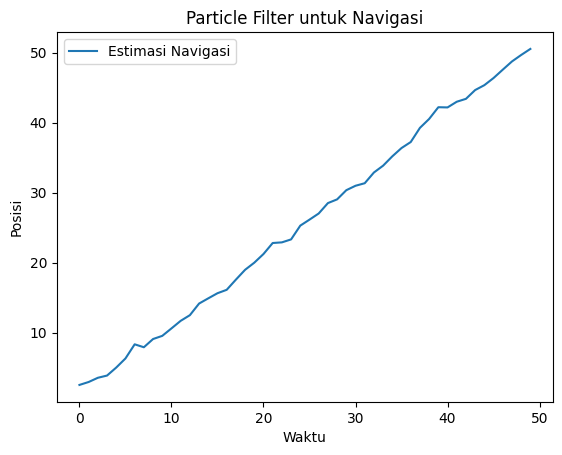

In [ ]:
# Visualisasi
plt.plot(range(steps), positions_nav, label="Estimasi Navigasi")
plt.legend()
plt.xlabel("Waktu")
plt.ylabel("Posisi")
plt.title("Particle Filter untuk Navigasi")
plt.show()


* menunjukkan bahwa Particle Filter dapat digunakan untuk memperkirakan posisi suatu objek secara akurat, bahkan dalam kondisi yang bising atau tidak pasti. Estimasi posisi yang baik sangat penting untuk berbagai aplikasi, seperti navigasi robot, kendaraan otonom, dan sistem pelacakan objek.